In [18]:
from pandas_datareader import data as pdr
from datetime import datetime,date
import pandas as pd
import yfinance as yf
yf.pdr_override()


from datetime import datetime
startdate = datetime(2015,1,1)
today = date.today()
enddate = today

data = pd.read_csv("TATASTEEL.NS.csv")

df = pdr.get_data_yahoo("TATASTEEL.NS", start=startdate, end=enddate)

# dates = pd.to_datetime(data["Date"])
cols = list(df)[0:7]
data = df[cols].astype(float)
data


[*********************100%***********************]  1 of 1 completed


KeyError: "None of [Float64Index([ 38.53343200683594,   39.1336555480957,  39.70053482055664,\n               37.77600860595703,  37.05192565917969, 37.628334045410156,\n               38.07611846923828, 37.799827575683594,  37.29964065551758,\n               35.90388107299805,\n              ...\n              104.80000305175781,  104.9000015258789,  102.0999984741211,\n              102.30000305175781,              102.5,  103.5999984741211,\n                           104.5,  104.0999984741211,  104.8499984741211,\n               104.3499984741211],\n             dtype='float64', length=2041)] are in the [columns]"

In [2]:
data.shape

(2041, 6)

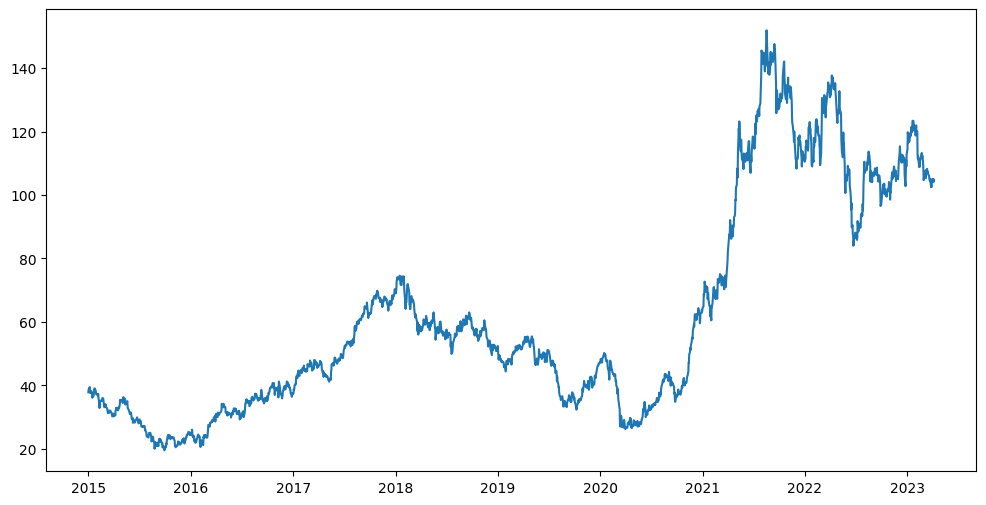

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(data["Open"])

In [4]:
import numpy as np


In [5]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# print(df)
data = scaler.fit_transform(data)

print(data)

# print(scaler.inverse_transform(df))

[[-0.70855434 -0.70110457 -0.68972733 -0.68672826 -0.61693129 -0.99450389]
 [-0.68326581 -0.68146283 -0.66402244 -0.66877918 -0.6088297  -0.85696205]
 [-0.66337592 -0.65775248 -0.64380509 -0.65182723 -0.60117817 -0.58695294]
 ...
 [ 1.29758984  1.25945608  1.31003759  1.2739739   2.57271674 -1.06318961]
 [ 1.26776617  1.25209318  1.29184858  1.2964019   2.59944411 -1.01448376]
 [ 1.29013392  1.25503829  1.32216328  1.2814499   2.58162586 -1.07461179]]


In [6]:
data = np.array(data)
train_size = int(len(data)*0.80)
train_data,test_data = data[:train_size] ,data[train_size:]
train_data,test_data

(array([[-0.70855434, -0.70110457, -0.68972733, -0.68672826, -0.61693129,
         -0.99450389],
        [-0.68326581, -0.68146283, -0.66402244, -0.66877918, -0.6088297 ,
         -0.85696205],
        [-0.66337592, -0.65775248, -0.64380509, -0.65182723, -0.60117817,
         -0.58695294],
        ...,
        [ 2.37422458,  2.33591227,  2.30799757,  2.26858078,  1.03887114,
         -0.15313056],
        [ 2.30861258,  2.37037059,  2.35953247,  2.42587562,  1.12219436,
          0.73023384],
        [ 2.44580168,  2.414548  ,  2.45760055,  2.45323803,  1.13668895,
          0.20863561]]),
 array([[ 2.35334809,  2.50849869,  2.37908558,  2.53188522,  1.17835056,
          2.82614017],
        [ 2.58895497,  2.67902327,  2.62630195,  2.70458106,  1.26983222,
          2.55673652],
        [ 2.69453104,  2.6775506 ,  2.68556725,  2.65763157,  1.24496182,
          1.37428256],
        ...,
        [ 1.29758984,  1.25945608,  1.31003759,  1.2739739 ,  2.57271674,
         -1.06318961],
  

In [7]:
def CreateDataset(dataset,time_steps):
    dataX,dataY = [],[]
    for i in range(len(dataset)-time_steps-1):
        
        dataX.append(dataset[i:i+time_steps])
        dataY.append(dataset[i+time_steps,3])
    return np.array(dataX),np.array(dataY)
    
    

In [8]:
time_steps = 14
train_x,train_y = CreateDataset(train_data,time_steps)
test_x,test_y = CreateDataset(test_data,time_steps)

In [9]:
train_x.shape[2],train_y.shape

(6, (1617,))

In [10]:
# train_x = train_x.reshape((train_x.shape[0],train_x.shape[1],1))
# test_x  = test_x.reshape((test_x.shape[0],test_x.shape[1],1))

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.layers import LSTM




In [13]:

model = Sequential()
model.add(LSTM(100,activation='relu',return_sequences=True,input_shape=(train_x.shape[1],train_x.shape[2])))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50,return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer='adam',loss="mse")

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 14, 100)           42800     
                                                                 
 lstm_1 (LSTM)               (None, 14, 50)            30200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 93,251
Trainable params: 93,251
Non-trainable params: 0
_________________________________________________________________


In [15]:
train_x.shape,train_y.shape

((1617, 14, 6), (1617,))

In [16]:
model.fit(train_x,train_y,validation_data=(test_x,test_y),epochs=50,batch_size=16,verbose=1,validation_split=0.1)

Epoch 1/50
102/102 [==============================] - 15s 39ms/step - loss: 0.0362 - val_loss: 0.0894
Epoch 2/50
102/102 [==============================] - 3s 25ms/step - loss: 0.0146 - val_loss: 0.3843
Epoch 3/50
102/102 [==============================] - 3s 25ms/step - loss: 0.0140 - val_loss: 0.1072
Epoch 4/50
102/102 [==============================] - 3s 25ms/step - loss: 0.0113 - val_loss: 0.4837
Epoch 5/50
102/102 [==============================] - 3s 25ms/step - loss: 0.0104 - val_loss: 0.4464
Epoch 6/50
102/102 [==============================] - 3s 25ms/step - loss: 0.0105 - val_loss: 0.1019
Epoch 7/50
102/102 [==============================] - 3s 25ms/step - loss: 0.0088 - val_loss: 0.3886
Epoch 8/50
102/102 [==============================] - 3s 26ms/step - loss: 0.0100 - val_loss: 0.4991
Epoch 9/50
102/102 [==============================] - 3s 25ms/step - loss: 0.0094 - val_loss: 0.2910
Epoch 10/50
102/102 [==============================] - 3s 25ms/step - loss: 0.0085 - val_l

In [ ]:
predict = model.predict(test_x)

print(np.square(predict-test_y).mean())


In [ ]:
plt.figure(figsize=(12,6))
# plt.plot(data)
plt.plot(np.append(train_y,test_y))
plt.plot(np.append(train_y,predict))
plt.plot(train_y)
plt.legend(["Real",'Predict','Training'])


In [ ]:
# future = 30
# lists = np.array(test_x[0].reshape(1,time_steps,test_x[]))
# preds =[]
# l=[]
# for i in range(future):
#     print(i)
#     pred = model.predict(lists[i])
# #     [[1,2,3],[2,3,4],[5,6,7]]
#     l = np.append(lists[i],listspred)
#     preds.append(pred[0][0])
#     l = np.delete(l,0)
    
#     lists = np.vstack([lists,l])
# print(preds)
# print(lists)

In [ ]:
# preds = np.array(preds)

In [ ]:
# plt.figure(figsize=(12,6))
# # plt.plot(data)
# plt.plot(np.append(train_y,test_y[:31]))
# plt.plot(np.append(train_y,preds))
# plt.plot(train_y)
# plt.legend(["Real",'Predict','Training'])

In [ ]:
# start = 1100
# lists = np.array(train_x[start].reshape(1,time_steps))
# preds =[]
# l=[]
# for i in range(50):
#     print(i)
#     pred = model.predict(lists[i].reshape(1,time_steps,1))
# #     [[1,2,3],[2,3,4],[5,6,7]]
#     l = np.append(lists[i],pred)
#     preds.append(pred[0][0])
#     l = np.delete(l,0)
    
#     lists = np.vstack([lists,l])

# preds = np.array(preds)

# plt.figure(figsize=(12,6))
# # plt.plot(data)
# plt.plot(np.append(train_y,test_y[:31]))
# plt.plot(np.append(train_y[:start],preds))
# plt.plot(train_y)
# plt.legend(["Real",'Predict','Training'])